<a href="https://colab.research.google.com/github/jcastellanos11/books-recomendation/blob/main/Recomendation_books_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpieza de los dataset para el modelo

Los data sets se obtiene directamente de: https://www.kaggle.com/datasets/saurabhbagchi/books-dataset?resource=download




# Librerías a utilizar

In [3]:
# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

!pip install kneed # Instalar la librería kneed

import kneed

from kneed import KneeLocator
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sns.set(style="whitegrid")

# Conexión con drive google

In [4]:
# este codigo Solo en Colab
try:
    import google.colab
    !pip install -q gdown
except:
    pass


# Descarga de Archivos

In [5]:
# Descargar archivos CSV desde Google Drive
id_libros = '1i7_qt_yGVjA2AEwafbgY_eTSGZFehIsw'
id_valoraciones = '18eyeWv246Cq8laI8dIxBTDw4tYQ3eYeI'
id_usuarios = '1599meBlCba4Ql3wGDn25WCF4xjsHXIyK'



gdown.download(f'https://drive.google.com/uc?id={id_libros}', 'books.csv', quiet=False)
gdown.download(f'https://drive.google.com/uc?id={id_valoraciones}', 'valoraciones.csv', quiet=False)
gdown.download(f'https://drive.google.com/uc?id={id_usuarios}', 'usuarios.csv', quiet=False)



Downloading...
From: https://drive.google.com/uc?id=1i7_qt_yGVjA2AEwafbgY_eTSGZFehIsw
To: /content/books.csv
100%|██████████| 74.7M/74.7M [00:00<00:00, 146MB/s]
Downloading...
From: https://drive.google.com/uc?id=18eyeWv246Cq8laI8dIxBTDw4tYQ3eYeI
To: /content/valoraciones.csv
100%|██████████| 30.7M/30.7M [00:00<00:00, 52.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1599meBlCba4Ql3wGDn25WCF4xjsHXIyK
To: /content/usuarios.csv
100%|██████████| 12.3M/12.3M [00:00<00:00, 48.1MB/s]


'usuarios.csv'

# Cargar Archivos

In [6]:
# Cargar datasets originales
# libros_bruto = pd.read_csv('libros.csv', sep=';', encoding='latin-1', on_bad_lines='warn', dtype=str)
libros_bruto = pd.read_csv('/content/books.csv', sep=',', encoding='latin-1', on_bad_lines='warn', dtype=str)
valoraciones_bruto = pd.read_csv('/content/valoraciones.csv', sep=';', encoding='latin-1', on_bad_lines='warn')
usuarios_bruto = pd.read_csv('/content/usuarios.csv', sep=';', encoding='latin-1', on_bad_lines='warn', dtype=str)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Skipping line 241707: expected 10 fields, saw 11
Skipping line 241709: expected 10 fields, saw 11
Skipping line 241716: expected 10 fields, saw 11
Skipping line 241728: expected 10 fields, saw 12
Skipping line 241730: expected 10 fields, saw 12
Skipping line 241740: expected 10 fields, saw 12
Skipping line 241744: expected 10 fields, saw 11
Skipping line 241752: expected 10 fields, saw 11
Skipping line 241760: expected 10 fields, saw 11
Skipping line 241762: expected 10 fields, saw 11
Skipping line 241765: expected 10 fields, saw 11
Skipping line 241775: expected 10 fields, saw 11
Skipping line 241783: expected 10 fields, saw 11
Skipping line 241784: expected 10 fields, saw 11
Skipping line 241787: expected 10 fields, saw 11
Skipping line 241799: expected 10 fields, saw 11
Skipping line 241806: expected 10 fields, saw 11
Skipping line 241808: expected 10 fields, saw 11
Skipping line 241811: expected 10 fields, saw 12
Sk

# Exploración Inicial de los datos

Revisamos por dataset lo siguiente:

* Cantidad de filas y columnas
* Lista de columnas
* Información base, como tipos de columna (objet, int)Etc.., conteo de valores null por columna.
* Valores duplicados





In [7]:
def explorar_dataset_v2(nombre, df, clave_duplicado=None):
    print(f"\n📘 EXPLORACIÓN DEL DATASET: {nombre.upper()}")
    print("="*70)

    # 1. Estructura básica
    print(f"\n🔢 Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
    print(f"\n📋 Columnas y tipos de datos:")
    print(df.dtypes)

    # 2. Primeras filas
    print(f"\n🔍 Primeras 5 filas:")
    print(df.head())

    # 3. Nulos por columna
    print("\n🧯 Nulos por columna:")
    nulls = df.isnull().sum()
    print(nulls[nulls > 0].sort_values(ascending=False))

    # 4. Duplicados
    if clave_duplicado:
        count = df.duplicated(subset=clave_duplicado).sum()
        print(f"\n♻️ Filas duplicadas basadas en '{clave_duplicado}': {count}")
    else:
        count = df.duplicated().sum()
        print(f"\n♻️ Filas duplicadas completas: {count}")

    # 5. Valores únicos y repetidos por columna
    print("\n📎 Valores únicos y repetidos por columna:")
    for col in df.columns:
        total = df[col].shape[0]
        unique_vals = df[col].nunique(dropna=False)
        repeated_vals = total - unique_vals
        print(f"  - {col}: únicos={unique_vals}, repetidos={repeated_vals}")

    # 6. Estadísticas descriptivas por tipo
    print("\n📈 Estadísticas descriptivas - Variables numéricas:")
    print(df.describe().T)

    print("\n📊 Estadísticas descriptivas - Variables categóricas:")
    print(df.describe(include='object').T)

    print("="*70)


explorar_dataset_v2("Libros", libros_bruto, clave_duplicado='ISBN')
explorar_dataset_v2("Valoraciones", valoraciones_bruto, clave_duplicado='User-ID')
explorar_dataset_v2("Usuarios", usuarios_bruto, clave_duplicado='User-ID')



📘 EXPLORACIÓN DEL DATASET: LIBROS

🔢 Dimensiones: 225618 filas x 10 columnas

📋 Columnas y tipos de datos:
ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
categories             object
language               object
dtype: object

🔍 Primeras 5 filas:
        ISBN                                         Book-Title  \
0  195153448                                Classical Mythology   
1    2005018                                       Clara Callan   
2   60973129                               Decision in Normandy   
3  374157065  Flu: The Story of the Great Influenza Pandemic...   
4  399135782                             The Kitchen God's Wife   

            Book-Author Year-Of-Publication                Publisher  \
0    Mark P. O. Morford                2002  Oxford University Press   
1  Richard

## Buscar valos nulos por data set

Dados los datos, observamos que, encontramos valores Null en el data set de Libros y en el de usuarios, con la columna edad.

In [8]:
def obtener_indices(objeto, valor):
    lista_posiciones = []
    resultado = objeto.isin([valor])
    columnas = list(resultado.any()[resultado.any() == True].index)
    for col in columnas:
        filas = list(resultado[col][resultado[col] == True].index)
        for fila in filas:
            lista_posiciones.append((fila, col))
    return lista_posiciones

In [9]:
# Buscar posiciones de NaN antes de limpiar
posiciones_nan = obtener_indices(libros_bruto, np.nan)
print(' Posiciones de NaN en libros_bruto:')
for pos in posiciones_nan:
    print(pos)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
(217357, 'language')
(217358, 'language')
(217360, 'language')
(217361, 'language')
(217362, 'language')
(217366, 'language')
(217367, 'language')
(217368, 'language')
(217369, 'language')
(217370, 'language')
(217371, 'language')
(217372, 'language')
(217373, 'language')
(217374, 'language')
(217375, 'language')
(217377, 'language')
(217378, 'language')
(217379, 'language')
(217380, 'language')
(217381, 'language')
(217382, 'language')
(217383, 'language')
(217384, 'language')
(217385, 'language')
(217386, 'language')
(217388, 'language')
(217389, 'language')
(217390, 'language')
(217391, 'language')
(217392, 'language')
(217393, 'language')
(217394, 'language')
(217395, 'language')
(217396, 'language')
(217397, 'language')
(217399, 'language')
(217400, 'language')
(217401, 'language')
(217402, 'language')
(217403, 'language')
(217404, 'language')
(217405, 'language')
(217406, 'language')
(217407, 'language')
(217409, 

## Función de Limpieza

In [18]:
# Reemplaza valores nulos, menores a 10 o mayores a 100 con un valor aleatorio entre Q2 y Q3
def replace_null_with_random_iqr(age, q2, q3):
    if pd.isnull(age) or age < 10 or age > 100:
        return int(np.random.uniform(q2, q3))
    return age

# Función de limpieza general para los datasets de libros, valoraciones y usuarios
def cargar_y_limpiar_datos(df_libros, df_valoraciones, df_usuarios):
    # Crear copias para no modificar los originales
    libros = df_libros.copy()
    valoraciones = df_valoraciones.copy()
    usuarios = df_usuarios.copy()

    ##### LIMPIEZA DE LIBROS #####

    # Eliminar columnas innecesarias de URLs de imágenes
    libros.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], errors='ignore', inplace=True)

    # Eliminar filas con valores faltantes en columnas clave
    libros.dropna(subset=['ISBN', 'Book-Title', 'Book-Author'], inplace=True)

    # Convertir el año de publicación a formato numérico, forzando errores a NaN
    libros['Year-Of-Publication'] = pd.to_numeric(libros['Year-Of-Publication'], errors='coerce')

    # Calcular la media de los años válidos (ignorando nulos)
    anio_promedio = libros['Year-Of-Publication'].mean(skipna=True)

    # Reemplazar valores nulos por el promedio redondeado
    libros['Year-Of-Publication'].fillna(round(anio_promedio), inplace=True)

    # Convertir a entero
    libros['Year-Of-Publication'] = libros['Year-Of-Publication'].astype(int)

    # Eliminar libros duplicados según el ISBN
    libros.drop_duplicates(subset='ISBN', inplace=True)

    ##### LIMPIEZA DE USUARIOS #####
    # Eliminar usuarios duplicados y sin identificador
    usuarios.drop_duplicates(subset='User-ID', inplace=True)
    usuarios.dropna(subset=['User-ID'], inplace=True)

    # Convertir edad a numérico y reemplazar nulos con un valor aleatorio entre Q2 y Q3
    usuarios['Age'] = pd.to_numeric(usuarios['Age'], errors='coerce')
    q2 = usuarios['Age'].dropna().quantile(0.50)
    q3 = usuarios['Age'].dropna().quantile(0.75)
    usuarios['Age'] = usuarios['Age'].apply(lambda age: replace_null_with_random_iqr(age, q2, q3))
    usuarios['Age'] = usuarios['Age'].astype(int)

    # Separar la columna 'Location' en tres nuevas columnas: 'City', 'State' y 'Country'
    location_split = usuarios["Location"].str.split(",", expand=True)
    usuarios["City"] = location_split[0].str.strip()
    usuarios["State"] = location_split[1].str.strip() if location_split.shape[1] > 1 else "unknown"
    usuarios["Country"] = location_split[2].str.strip() if location_split.shape[1] > 2 else "unknown"

    # Eliminar la columna original 'Location'
    usuarios.drop(columns=['Location'], errors='ignore', inplace=True)



    ##### LIMPIEZA DE VALORACIONES #####
    # Eliminar valoraciones con campos clave faltantes
    valoraciones.dropna(subset=['User-ID', 'ISBN', 'Book-Rating'], inplace=True)

    # Filtrar valoraciones fuera del rango válido (0 a 10)
    valoraciones = valoraciones[valoraciones['Book-Rating'].between(0, 10)]

    ## Eliminar registros que contengan libros inexistentes en el data set de libros ##

    # Asegurar que ISBN sea string y esté limpio en ambos datasets
    libros['ISBN'] = libros['ISBN'].astype(str).str.strip()
    valoraciones['ISBN'] = valoraciones['ISBN'].astype(str).str.strip()


    # Remover ceros a la izquierda solo si el ISBN es completamente numérico
    valoraciones['ISBN'] = valoraciones['ISBN'].apply(
        lambda x: str(int(x)) if x.isdigit() else x
    )

    # Filtrar valoraciones cuyo ISBN sí existe en libros
    valoraciones_iniciales = valoraciones.shape[0]
    valoraciones = valoraciones[valoraciones['ISBN'].isin(libros['ISBN'])]
    valoraciones_filtradas = valoraciones.shape[0]

    print(f"Se eliminaron {valoraciones_iniciales - valoraciones_filtradas} valoraciones con ISBN no presentes en libros.")


    ## Eliminar registros que contengan usuarios inexistentes en el data set de usuarios ##
    # Asegurar que User-ID tenga el mismo tipo de dato en ambos datasets (por seguridad)
    valoraciones['User-ID'] = valoraciones['User-ID'].astype(str).str.strip()
    usuarios['User-ID'] = usuarios['User-ID'].astype(str).str.strip()

    # Filtrar valoraciones cuyo User-ID exista en el dataset de usuarios
    valoraciones_antes = valoraciones.shape[0]
    valoraciones = valoraciones[valoraciones['User-ID'].isin(usuarios['User-ID'])]
    valoraciones_despues = valoraciones.shape[0]

    print(f"Se eliminaron {valoraciones_antes - valoraciones_despues} valoraciones con usuarios no presentes en el dataset de usuarios.")



    # Eliminar duplicados exactos
    valoraciones.drop_duplicates(inplace=True)

    # Devolver los tres datasets limpios
    return libros, valoraciones, usuarios


# Ejecutar limpieza





In [19]:
# Aplicar limpieza
df_libros, df_valoraciones, df_usuarios = cargar_y_limpiar_datos(libros_bruto, valoraciones_bruto, usuarios_bruto)

/tmp/ipython-input-18-2424232445.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  libros['Year-Of-Publication'].fillna(round(anio_promedio), inplace=True)


Se eliminaron 255117 valoraciones con ISBN no presentes en libros.
Se eliminaron 0 valoraciones con usuarios no presentes en el dataset de usuarios.


In [20]:
#Comparativa antes y después
print("\nLibros antes:", libros_bruto.shape, "→ después:", df_libros.shape)
print("Valoraciones antes:", valoraciones_bruto.shape, "→ después:", df_valoraciones.shape)
print("Usuarios antes:", usuarios_bruto.shape, "→ después:", df_usuarios.shape)


Libros antes: (225618, 10) → después: (225615, 7)
Valoraciones antes: (1149780, 3) → después: (894655, 3)
Usuarios antes: (278858, 3) → después: (278858, 5)


In [21]:
# 🧪 Vista previa de los datos limpios
print("Books:")
print(df_libros.head())
print("\nRatings:")
print(df_valoraciones.head())
print("\nUsers:")
print(df_usuarios.head())

Books:
        ISBN                                         Book-Title  \
0  195153448                                Classical Mythology   
1    2005018                                       Clara Callan   
2   60973129                               Decision in Normandy   
3  374157065  Flu: The Story of the Great Influenza Pandemic...   
4  399135782                             The Kitchen God's Wife   

            Book-Author  Year-Of-Publication                Publisher  \
0    Mark P. O. Morford                 2002  Oxford University Press   
1  Richard Bruce Wright                 2001    HarperFlamingo Canada   
2          Carlo D'Este                 1991          HarperPerennial   
3      Gina Bari Kolata                 1999     Farrar Straus Giroux   
4               Amy Tan                 1991         Putnam Pub Group   

           categories language  
0  Literary Criticism       en  
1                 NaN       es  
2             History       en  
3      Social Scien

**LIBROS: Pasar categorias a variables Numericas**

Este código transforma las categorías de libros en números usando LabelEncoder, permitiendo su uso en modelos como KMeans. También reemplaza nulos con "Unknown" y muestra el mapeo resultante.

In [22]:
from sklearn.preprocessing import LabelEncoder

# Rellenar valores nulos con 'Unknown'
df_libros['categories'] = df_libros['categories'].fillna('Unknown')

# Aplicar codificación con LabelEncoder
le = LabelEncoder()
df_libros['categories_numericas'] = le.fit_transform(df_libros['categories'])

# Ver diccionario de equivalencias (opcional)
categorias_map = dict(zip(le.classes_, le.transform(le.classes_)))
print("\nDiccionario de categorías a números:")
print(categorias_map)

# Mostrar ejemplo de resultado
print("\nPrimeras filas con categorías numéricas:")
print(df_libros[['categories', 'categories_numericas']].head())



Diccionario de categorías a números:
{'.': np.int64(0), '1876-1907': np.int64(1), '1947-': np.int64(2), '24 (Television program)': np.int64(3), '35mm cameras': np.int64(4), '401(k) plans': np.int64(5), 'ACCELERATED READER 3.1 PTS. 1': np.int64(6), 'AIDS (Disease)': np.int64(7), 'AIDS (Disease) in infants': np.int64(8), 'Aardvark': np.int64(9), 'Abandoned children': np.int64(10), 'Abingdon (England)': np.int64(11), 'Aboriginal Australians': np.int64(12), 'Abortion': np.int64(13), 'Absence and presumption of death': np.int64(14), 'Absentee fathers': np.int64(15), 'Abused women': np.int64(16), 'Academic writing': np.int64(17), 'Acceleration (Mechanics)': np.int64(18), 'Accomplices': np.int64(19), 'Accounting': np.int64(20), 'Achievement motivation in children': np.int64(21), 'Acid deposition': np.int64(22), 'Acorna (Fictitious character)': np.int64(23), 'Acrylic painting': np.int64(24), 'Acting': np.int64(25), 'ActionScript (Computer program language)': np.int64(26), 'Active learning': n

In [23]:
from sklearn.preprocessing import LabelEncoder

# Rellenar valores nulos con 'Unknown'
df_libros['Book-Author'] = df_libros['Book-Author'].fillna('Unknown')

# Aplicar codificación con LabelEncoder
le = LabelEncoder()
df_libros['author_numerico'] = le.fit_transform(df_libros['Book-Author'])

# Ver diccionario de equivalencias (opcional)
author_map = dict(zip(le.classes_, le.transform(le.classes_)))
print("\nDiccionario de autores a números:")
print(author_map)

# Mostrar ejemplo de resultado
print("\nPrimeras filas con autores numéricas:")
print(df_libros[['Book-Author', 'author_numerico']].head())



Diccionario de autores a números:
{' 14 : Ensayo)"': np.int64(0), ' D. Chiel': np.int64(1), ' Friends\\" Complete Story Collection"': np.int64(2), ' Gordon Craig"': np.int64(3), ' J. D. Landis': np.int64(4), ' Mimma Balia': np.int64(5), ' Other Essays on Teaching &amp': np.int64(6), ' Skies (Artists Photo Reference)"': np.int64(7), ' The \\"Egmont\\" Overture"': np.int64(8), ' Tony Shryane"': np.int64(9), ' Unfounded Findings\\""': np.int64(10), ' \\"A Fix Like This\\" (Crime Club)"': np.int64(11), ' \\"Afternoon Raag\\"': np.int64(12), ' \\"Forsaking All Others\\"': np.int64(13), ' \\"The Guillotined Woman\\""': np.int64(14), ' being dust from the law courts': np.int64(15), ' short stories"': np.int64(16), ' the Catalog Business"': np.int64(17), "'N Sync": np.int64(18), '1st Graders of Samuel s Nixon School Carnegie Penn': np.int64(19), '21st Century Publishing': np.int64(20), '73 Magazine Editors': np.int64(21), ';Katie Stewart"': np.int64(22), 'A &amp; E Television Network': np.int

**USUARIOS:** Distribucion de edades

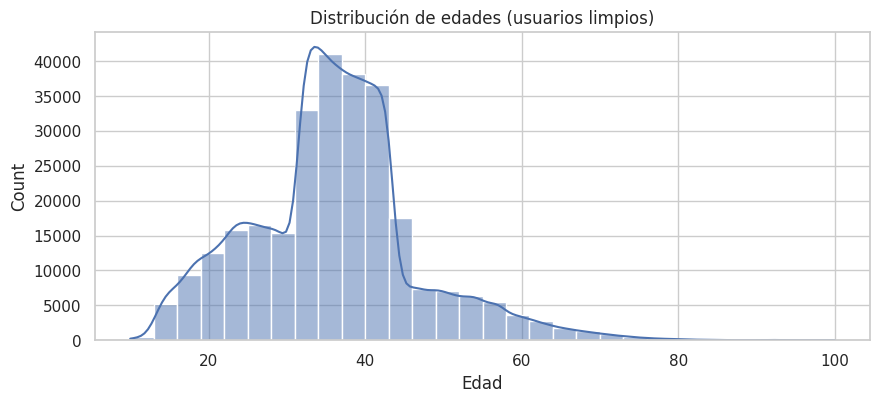

In [24]:
# Distribución de edades limpia
plt.figure(figsize=(10, 4))
sns.histplot(df_usuarios['Age'], bins=30, kde=True)
plt.title("Distribución de edades (usuarios limpios)")
plt.xlabel("Edad")
plt.show()

# Preparar dataset final para clustering con K-Means

In [26]:
# Preparación del dataset final para clustering con K-Means

# Asegurarse de que la columna 'User-ID' tenga el mismo tipo de dato en ambos dataframes
# Convertimos 'User-ID' in df_valoraciones and df_usuarios to int
df_usuarios['User-ID'] = pd.to_numeric(df_usuarios['User-ID'], errors='coerce').fillna(-1).astype(int)
df_valoraciones['User-ID'] = pd.to_numeric(df_valoraciones['User-ID'], errors='coerce').fillna(-1).astype(int)


# Fusionamos valoraciones con usuarios y libros para tener un dataset enriquecido
valoraciones_usuarios = pd.merge(df_valoraciones, df_usuarios, on='User-ID', how='inner')
dataset_final = pd.merge(valoraciones_usuarios, df_libros, on='ISBN', how='inner')

# Verificación de columnas tras el merge
print("\nColumnas del dataset final:")
print(dataset_final.columns.tolist())

# Selección de características para clustering (puedes ajustar esto según el modelo)
# features = dataset_final[['User-ID', 'Age', 'Book-Rating', 'Year-Of-Publication']]
# Esto parece estar duplicado en la celda siguiente, lo puedes dejar ahí.

# Vista previa del dataset final
print("\nDataset final para clustering:")
print(dataset_final.head()) # Imprime el dataset final completo, no solo las features aún.


Columnas del dataset final:
['User-ID', 'ISBN', 'Book-Rating', 'Age', 'City', 'State', 'Country', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'categories', 'language', 'categories_numericas', 'author_numerico']

Dataset final para clustering:
   User-ID        ISBN  Book-Rating  Age     City            State    Country  \
0   276725  034545104X            0   34    tyler            texas        usa   
1   276726   155061224            5   36  seattle       washington        usa   
2   276727   446520802            0   16        h  new south wales  australia   
3   276729  052165615X            3   16   rijeka              n/a    croatia   
4   276729   521795028            6   16   rijeka              n/a    croatia   

                                          Book-Title      Book-Author  \
0                               Flesh Tones: A Novel       M. J. Rose   
1                                   Rites of Passage       Judith Rae   
2                            

In [27]:
# Verificación de columnas tras el merge
print("\nColumnas del dataset final:")
print(dataset_final.columns.tolist())





Columnas del dataset final:
['User-ID', 'ISBN', 'Book-Rating', 'Age', 'City', 'State', 'Country', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'categories', 'language', 'categories_numericas', 'author_numerico']


In [28]:
# Selección de características para clustering (Pendiente Definir)
features = dataset_final[['User-ID', 'Age', 'author_numerico','Book-Rating', 'categories_numericas']]




In [29]:
# Vista previa del dataset final
print("\nDataset final para clustering:")
print(features.head())


Dataset final para clustering:
   User-ID  Age  author_numerico  Book-Rating  categories_numericas
0   276725   34            54497            0                  2919
1   276726   36            45818            5                  2728
2   276727   16            64013            0                  2919
3   276729   16            69013            3                  2919
4   276729   16            81277            6                  2919


In [30]:
# Estandarizar las características para K-Means
from sklearn.preprocessing import StandardScaler

# Crear una instancia del StandardScaler
scaler = StandardScaler()

# Estandarizar las características seleccionadas
features_escaladas = scaler.fit_transform(features)

# Convertir el resultado de vuelta a un DataFrame (opcional, pero útil para inspeccionar)
features_escaladas_df = pd.DataFrame(features_escaladas, columns=features.columns)

# Mostrar las primeras filas del dataset estandarizado
print("\n🔍 Dataset estandarizado para modelado K-Means:")
print(features_escaladas_df.head())


🔍 Dataset estandarizado para modelado K-Means:
    User-ID       Age  author_numerico  Book-Rating  categories_numericas
0  1.699315 -0.316706         0.358553    -0.741171              0.473991
1  1.699328 -0.123545         0.025782     0.554525              0.166007
2  1.699340 -2.055159         0.723417    -0.741171              0.473991
3  1.699365 -2.055159         0.915127     0.036247              0.473991
4  1.699365 -2.055159         1.385355     0.813664              0.473991


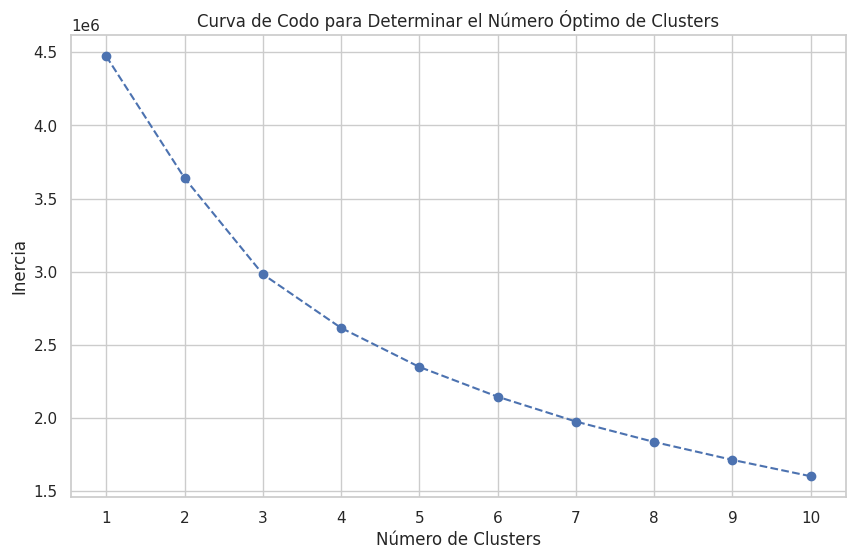

In [32]:
# Analizar graficamente la curva de codo para determinar el número óptimo de clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Lista para almacenar el valor de la inercia (suma de cuadrados intra-cluster)
inercia = []

# Rango de posibles números de clusters a probar (por ejemplo, de 1 a 10)
rango_clusters = range(1, 11)

for n_clusters in rango_clusters:
    # Inicializar el modelo K-Means con el número actual de clusters
    # 'n_init' especifica el número de veces que el algoritmo K-Means se ejecutará con diferentes semillas de centroides.
    # Se recomienda un valor de 10 o más.
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

    # Entrenar el modelo con los datos estandarizados
    kmeans.fit(features_escaladas)

    # Almacenar la inercia para este número de clusters
    inercia.append(kmeans.inertia_)

# Graficar la curva de codo
plt.figure(figsize=(10, 6))
plt.plot(rango_clusters, inercia, marker='o', linestyle='--')
plt.title('Curva de Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.xticks(rango_clusters)
plt.grid(True)
plt.show()

#se demora aprox 2 minutos

Elegir el número óptimo de clusters

In [33]:
from sklearn.cluster import KMeans

# Suponiendo que tus datos están en features
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(features)

features['cluster'] = clusters


features.groupby('cluster').mean()

/tmp/ipython-input-33-2232975034.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['cluster'] = clusters


User-ID        Age  author_numerico  Book-Rating  \
cluster                                                           
0        106023.206435  36.842405     45210.982571     3.035729   
1        243573.686144  36.725502     45247.193678     2.653217   
2         35384.799227  37.056890     45031.903624     3.001171   
3        175855.334148  38.524930     45090.852040     2.749383   

         categories_numericas  
cluster                        
0                 2627.513192  
1                 2619.903674  
2                 2623.299229  
3                 2629.642698

In [35]:

features






User-ID  Age  author_numerico  Book-Rating  categories_numericas  \
0        276725   34            54497            0                  2919   
1        276726   36            45818            5                  2728   
2        276727   16            64013            0                  2919   
3        276729   16            69013            3                  2919   
4        276729   16            81277            6                  2919   
...         ...  ...              ...          ...                   ...   
894650   276704   41            49042            0                  2919   
894651   276704   41            14690            9                   618   
894652   276706   18             3492            0                  1732   
894653   276709   38            12181           10                  2919   
894654   276721   14            40736           10                  2919   

        cluster  
0             1  
1             1  
2             1  
3             1  
4             1  
...         ...  
894650        1  
894651        1  
894652        1  
894653        1  
894654        1  

[894655 rows x 6 columns]

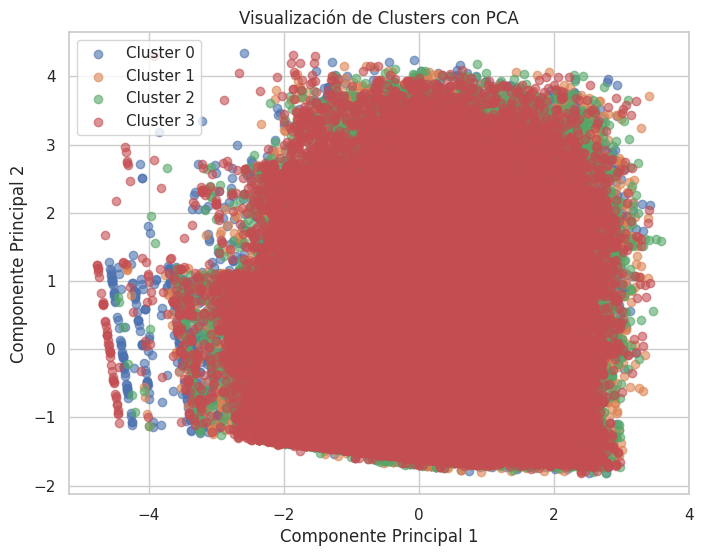

In [160]:
from sklearn.preprocessing import StandardScaler

# Variables a usar en el clustering
X = features[["Age","author_numerico",
                        "Book-Rating",
                        "categories_numericas"]]

# Escalado Z-score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducir a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Agregar a DataFrame temporal para graficar
df_plot = pd.DataFrame()
df_plot["PCA1"] = X_pca[:, 0]
df_plot["PCA2"] = X_pca[:, 1]
df_plot["cluster"] = features["cluster"]

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
for c in sorted(df_plot["cluster"].unique()):
    cluster_data = df_plot[df_plot["cluster"] == c]
    plt.scatter(cluster_data["PCA1"], cluster_data["PCA2"], label=f"Cluster {c}", alpha=0.6)

plt.title("Visualización de Clusters con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.grid(True)
plt.show()

# MODIFICACION DEL MODELO


Este código construye una base de perfil por usuario a partir del dataset features, resumiendo sus hábitos de lectura y preferencias. Se calcula:

    Promedio de calificaciones dadas por cada usuario (rating_promedio_usuario).

    Cantidad total de libros leídos por usuario (libros_leídos).

    Autor más frecuente entre los libros leídos (author_dominante).

    Categoría más frecuente leída por el usuario (categoria_dominante).

    Edad del usuario, tomando la primera disponible (Age).

Todos estos atributos se combinan en un solo DataFrame (df_perfil_usuarios) que representa el perfil lector de cada usuario.
<br><br>

Este paso se realiza para mejorar la calidad de los clusters generados con KMeans, ya que en intentos anteriores no se lograba una buena diferenciación de grupos únicamente con las valoraciones o libros.

In [36]:
features

User-ID  Age  author_numerico  Book-Rating  categories_numericas  \
0        276725   34            54497            0                  2919   
1        276726   36            45818            5                  2728   
2        276727   16            64013            0                  2919   
3        276729   16            69013            3                  2919   
4        276729   16            81277            6                  2919   
...         ...  ...              ...          ...                   ...   
894650   276704   41            49042            0                  2919   
894651   276704   41            14690            9                   618   
894652   276706   18             3492            0                  1732   
894653   276709   38            12181           10                  2919   
894654   276721   14            40736           10                  2919   

        cluster  
0             1  
1             1  
2             1  
3             1  
4             1  
...         ...  
894650        1  
894651        1  
894652        1  
894653        1  
894654        1  

[894655 rows x 6 columns]

# Limpieza y creación de base de datos

A continuación dejaremos una base limpia para empezar. Esta base es de datos es de prueba.

In [37]:
#Armamos base
# Paso 1: rating promedio por usuario
df_rating_prom = features.groupby("User-ID")["Book-Rating"].mean().reset_index()
df_rating_prom.columns = ["User-ID", "rating_promedio_usuario"]

# Paso 2: número de libros leídos
df_num_libros = features.groupby("User-ID")["Book-Rating"].count().reset_index()
df_num_libros.columns = ["User-ID", "libros_leídos"]

# Paso 3 actualizado: año promedio redondeado a un número entero
#df_avg_year = features.groupby("User-ID")["Year-Of-Publication"].mean().round(0).astype(int).reset_index()
#df_avg_year.columns = ["User-ID", "anio_promedio_publicacion"]

# Paso 3 Autor mas frecuente}
df_autor_dominante = features.groupby("User-ID")["author_numerico"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0]).reset_index()
df_autor_dominante.columns = ["User-ID", "author_dominante"]

# Paso 4: categoría más frecuente leída
df_categoria_dominante = features.groupby("User-ID")["categories_numericas"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0]).reset_index()
df_categoria_dominante.columns = ["User-ID", "categoria_dominante"]

# Paso 5: edad (tomar la primera si está duplicada por libro)
df_age = features.groupby("User-ID")["Age"].first().reset_index()

# Unir todo
df_perfil_usuarios = df_age.merge(df_rating_prom, on="User-ID") \
                           .merge(df_num_libros, on="User-ID") \
                           .merge(df_autor_dominante, on="User-ID") \
                           .merge(df_categoria_dominante, on="User-ID")

# Ver resultado
print(df_perfil_usuarios.head())


   User-ID  Age  rating_promedio_usuario  libros_leídos  author_dominante  \
0        2   18                   0.0000              1             57352   
1        8   34                   2.4375             16               764   
2        9   34                   2.0000              3             43113   
3       10   26                   0.0000              1             12476   
4       12   41                  10.0000              1             35843   

   categoria_dominante  
0                 2056  
1                 1477  
2                 2919  
3                 1879  
4                  618  


# Selección variables para K-means

In [38]:
from sklearn.preprocessing import StandardScaler

# Variables a usar en el clustering
X = df_perfil_usuarios[["Age",
                        "rating_promedio_usuario",
                        "libros_leídos",
                        "author_dominante",
                        "categoria_dominante"]]

# Escalado Z-score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Curva del codos para seleccionar número de clusters

In [68]:
pip install kneed


Elección automatizada de codos óptimos




📌 Número óptimo de clusters según Kneedle: 5


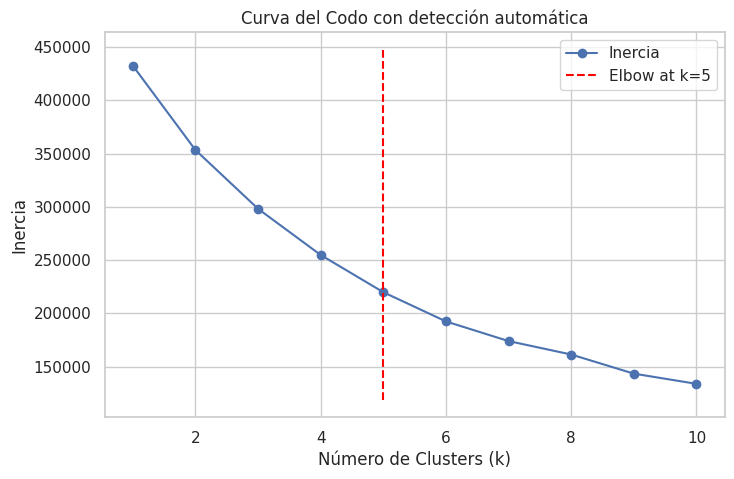

In [39]:
# Calcular inercia para k de 1 a 10
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Detectar el "knee" donde el codo es más pronunciado
knee_locator = KneeLocator(k_range, inertias, curve="convex", direction="decreasing")
optimal_k = knee_locator.knee
print(f"📌 Número óptimo de clusters según Kneedle: {optimal_k}")

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o', label='Inercia')
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red', label=f'Elbow at k={optimal_k}')
plt.title("Curva del Codo con detección automática")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia")
plt.legend()
plt.grid(True)
plt.show()


# Aplicamos K-means con 4 clusters




In [40]:
# Elegimos un número de clusters (puedes ajustar luego)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Asignar los resultados del clustering al DataFrame df_perfil_usuarios
df_perfil_usuarios['cluster'] = clusters

# Promedios por grupo para interpretar
df_perfil_usuarios.groupby("cluster").mean(numeric_only=True)



User-ID        Age  rating_promedio_usuario  libros_leídos  \
cluster                                                                     
0        139842.856512  36.290350                 3.952016       9.483981   
1        139692.706430  36.887888                 4.899443       9.199187   
2        138510.301039  36.722670                 4.490310       1.623121   
3        147695.081633  39.204082                 1.528949    1356.707483   

         author_dominante  categoria_dominante  
cluster                                         
0            17083.874860          2907.759138  
1            63777.547290          2900.266927  
2            39748.530473          1349.895805  
3            52074.244898          2919.000000

VISUALIZACION DE CLUSTERS

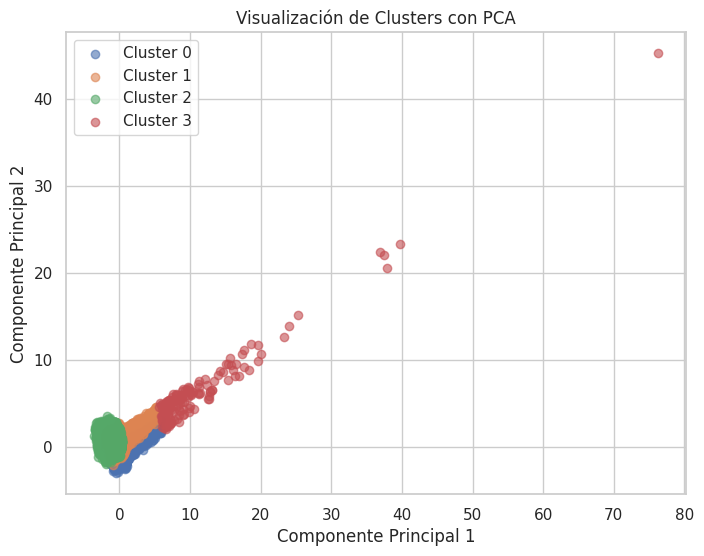

In [41]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducir a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Agregar a DataFrame temporal para graficar
df_plot = pd.DataFrame()
df_plot["PCA1"] = X_pca[:, 0]
df_plot["PCA2"] = X_pca[:, 1]
df_plot["cluster"] = df_perfil_usuarios["cluster"]

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
for c in sorted(df_plot["cluster"].unique()):
    cluster_data = df_plot[df_plot["cluster"] == c]
    plt.scatter(cluster_data["PCA1"], cluster_data["PCA2"], label=f"Cluster {c}", alpha=0.6)

plt.title("Visualización de Clusters con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.grid(True)
plt.show()


In [43]:
import numpy as np

features = ["Age", "rating_promedio_usuario", "libros_leídos", "author_dominante", "categoria_dominante"]
for i, comp in enumerate(pca.components_):
    print(f"\n📌 PCA{i+1}")
    for feature, weight in zip(features, comp):
        print(f"{feature}: {np.round(weight, 3)}")



📌 PCA1
Age: -0.083
rating_promedio_usuario: -0.554
libros_leídos: 0.604
author_dominante: -0.201
categoria_dominante: 0.53

📌 PCA2
Age: -0.287
rating_promedio_usuario: -0.173
libros_leídos: 0.348
author_dominante: 0.818
categoria_dominante: -0.311


KMEANS ANIDADO

In [44]:
from sklearn.cluster import KMeans

# Crear una nueva columna para guardar microclusters
df_perfil_usuarios["microcluster"] = -1  # valor temporal

# Número de microclusters que quieres por macrocluster (puede variar si lo deseas ajustar)
n_micro = 3

# Aplicar KMeans dentro de cada macrogrupo
for macro_id in df_perfil_usuarios["cluster"].unique():
    # Subconjunto del macrogrupo
    subset = df_perfil_usuarios[df_perfil_usuarios["cluster"] == macro_id].copy()
    idx = subset.index

    # Aplicar KMeans al subconjunto
    kmeans_micro = KMeans(n_clusters=n_micro, random_state=42)
    micro_labels = kmeans_micro.fit_predict(subset.drop(columns=["cluster", "microcluster"]))

    # Guardar microcluster como combinación jerárquica
    df_perfil_usuarios.loc[idx, "microcluster"] = [f"{macro_id}_{m}" for m in micro_labels]


df_perfil_usuarios


/tmp/ipython-input-44-1869845231.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2', '2_2

User-ID  Age  rating_promedio_usuario  libros_leídos  author_dominante  \
0            2   18                 0.000000              1             57352   
1            8   34                 2.437500             16               764   
2            9   34                 2.000000              3             43113   
3           10   26                 0.000000              1             12476   
4           12   41                10.000000              1             35843   
...        ...  ...                      ...            ...               ...   
86494   278846   23                 8.000000              1              1639   
86495   278849   23                 3.000000              3             42027   
86496   278851   33                 3.555556             18              2672   
86497   278852   32                 8.000000              1             17267   
86498   278854   34                 5.250000              8             24710   

       categoria_dominante  cluster microcluster  
0                     2056        2          2_2  
1                     1477        2          2_2  
2                     2919        0          0_2  
3                     1879        2          2_2  
4                      618        2          2_2  
...                    ...      ...          ...  
86494                 2919        0          0_1  
86495                 2919        0          0_1  
86496                 2919        0          0_1  
86497                 2919        0          0_1  
86498                 2919        0          0_1  

[86499 rows x 8 columns]

In [45]:
# se demora demasiado, no muestra grafica, evitar ejecutar
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt

# # Asegúrate de excluir columnas que no deben ir al modelo
# cols_excluir = ["User-ID", "cluster", "microcluster"]
# cols_numericas = df_perfil_usuarios.select_dtypes(include=["int64", "float64"]).columns.difference(cols_excluir)
# X = df_perfil_usuarios[cols_numericas]

# # Aplicar t-SNE
# tsne = TSNE(n_components=2, random_state=42, perplexity=30)
# X_2d = tsne.fit_transform(X)

# # Asignar las coordenadas al dataframe original
# df_perfil_usuarios["x"] = X_2d[:, 0]
# df_perfil_usuarios["y"] = X_2d[:, 1]


In [46]:
# from sklearn.manifold import TSNE

# # Reducir a 2D
# tsne = TSNE(n_components=2, random_state=42, perplexity=30)
# X_tsne = tsne.fit_transform(X_scaled)

# # Crear DataFrame para graficar
# df_tsne = pd.DataFrame()
# df_tsne["x"] = X_tsne[:, 0]
# df_tsne["y"] = X_tsne[:, 1]
# df_tsne["cluster"] = df_perfil_usuarios["cluster"]

# # Graficar
# plt.figure(figsize=(8, 6))
# for c in sorted(df_tsne["cluster"].unique()):
#     cluster_data = df_tsne[df_tsne["cluster"] == c]
#     plt.scatter(cluster_data["x"], cluster_data["y"], label=f"Cluster {c}", alpha=0.6)

# plt.title("Clusters visualizados con t-SNE")
# plt.xlabel("Dimensión 1")
# plt.ylabel("Dimensión 2")
# plt.legend()
# plt.grid(True)
# plt.show()

# Se demora 7 minutos


Entendiendo cada **cluster** formado por **K-means**

In [47]:
df_perfil_usuarios.groupby("cluster")[[
    "Age",
    "rating_promedio_usuario",
    "libros_leídos",
    "author_dominante",
    "categoria_dominante"
]].agg(["mean", "std"]).round(2)


Age        rating_promedio_usuario       libros_leídos           \
          mean    std                    mean   std          mean      std   
cluster                                                                      
0        36.29  10.69                    3.95  3.15          9.48    33.31   
1        36.89  10.86                    4.90  3.58          9.20    38.18   
2        36.72  10.71                    4.49  3.61          1.62     1.51   
3        39.20  10.11                    1.53  1.67       1356.71  1056.95   

        author_dominante           categoria_dominante          
                    mean       std                mean     std  
cluster                                                         
0               17083.87  12721.20             2907.76   80.52  
1               63777.55  15071.87             2900.27  110.26  
2               39748.53  26176.47             1349.90  407.85  
3               52074.24  27860.06             2919.00    0.00

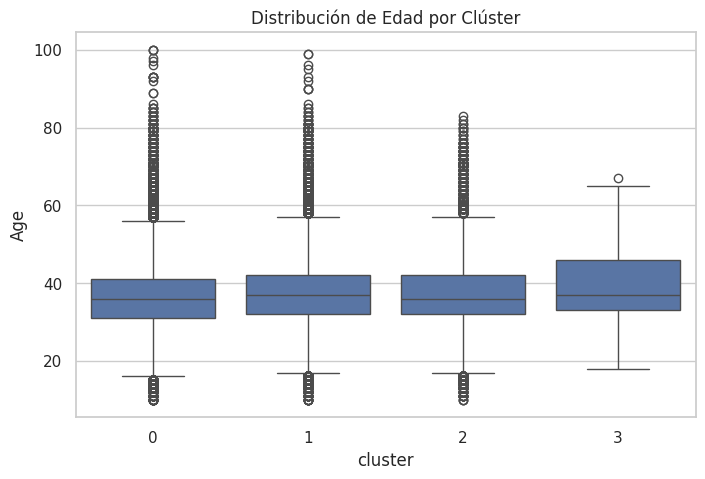

In [48]:


# Boxplot por edad
plt.figure(figsize=(8, 5))
sns.boxplot(x="cluster", y="Age", data=df_perfil_usuarios)
plt.title("Distribución de Edad por Clúster")
plt.show()


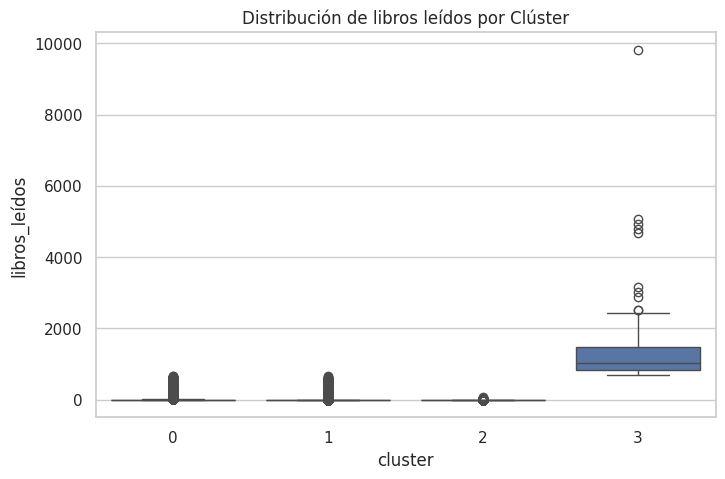

In [49]:
# Boxplot por Libros leidos
plt.figure(figsize=(8, 5))
sns.boxplot(x="cluster", y="libros_leídos", data=df_perfil_usuarios)
plt.title("Distribución de libros leídos por Clúster")
plt.show()


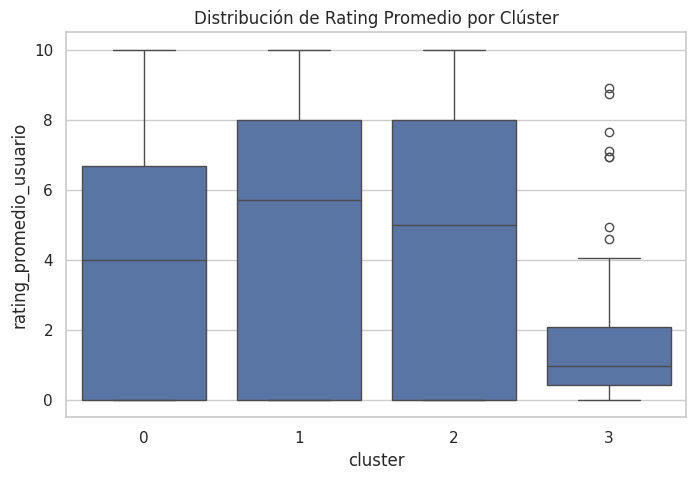

In [50]:
# Boxplot por Rating Promedio
plt.figure(figsize=(8, 5))
sns.boxplot(x="cluster", y="rating_promedio_usuario", data=df_perfil_usuarios)
plt.title("Distribución de Rating Promedio por Clúster")
plt.show()

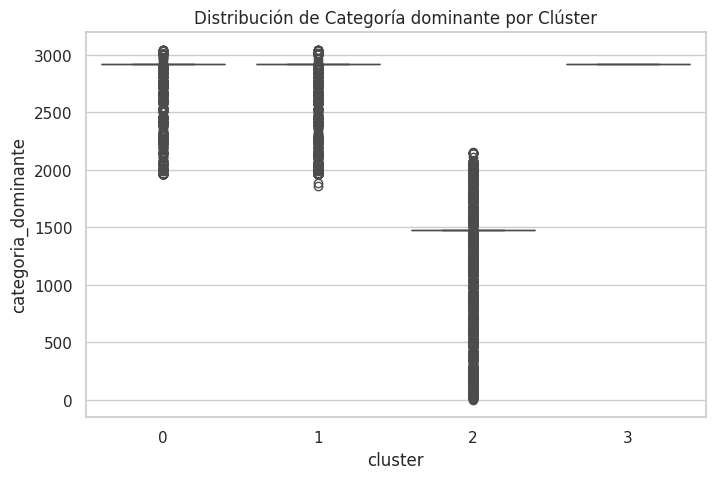

In [51]:
# Boxplot por Categoría Dominante
plt.figure(figsize=(8, 5))
sns.boxplot(x="cluster", y="categoria_dominante", data=df_perfil_usuarios)
plt.title("Distribución de Categoría dominante por Clúster")
plt.show()


# **Recomendaciones - Algoritmo**

In [52]:
import pandas as pd

# Cargar ratings
ratings = df_valoraciones
# Filtrar solo ratings útiles (> 0)
ratings = ratings[ratings["Book-Rating"].astype(int) > 0]

# Mostrar los primeros datos para verificar
print(ratings.head())


    User-ID        ISBN  Book-Rating
1    276726   155061224            5
3    276729  052165615X            3
4    276729   521795028            6
8    276744  038550120X            7
16   276747    60517794            9


In [53]:
df_historial = ratings.merge(
    df_perfil_usuarios[["User-ID", "cluster"]],
    on="User-ID",
    how="inner"  # ← importante para evitar NaN
)

df_historial



User-ID        ISBN  Book-Rating  cluster
0        276726   155061224            5        1
1        276729  052165615X            3        1
2        276729   521795028            6        1
3        276744  038550120X            7        0
4        276747    60517794            9        1
...         ...         ...          ...      ...
335531   276704   743211383            7        0
335532   276704   806917695            5        0
335533   276704  1563526298            9        0
335534   276709   515107662           10        0
335535   276721   590442449           10        1

[335536 rows x 4 columns]

In [54]:
df_valoraciones

User-ID        ISBN  Book-Rating
0         276725  034545104X            0
1         276726   155061224            5
2         276727   446520802            0
3         276729  052165615X            3
4         276729   521795028            6
...          ...         ...          ...
1149774   276704   876044011            0
1149775   276704  1563526298            9
1149776   276706   679447156            0
1149777   276709   515107662           10
1149778   276721   590442449           10

[894655 rows x 3 columns]

**Creacion de tabla de mejores libros valorados**
<br><br>Esta tabla se usara para los usuarios que nunca han comprado/valorado un libro del catalogo.

In [56]:
# Asegurar que ISBN sea string
df_valoraciones['ISBN'] = df_valoraciones['ISBN'].astype(str)

# Calcular promedio y número de valoraciones por libro
libros_populares = df_valoraciones.groupby("ISBN").agg(
    promedio_valoracion=("Book-Rating", "mean"),
    cantidad_valoraciones=("Book-Rating", "count")
).reset_index()

# Filtrar libros con un mínimo de valoraciones (ej. al menos 10)
libros_populares = libros_populares[libros_populares["cantidad_valoraciones"] >= 10]

# Ordenar por promedio y cantidad de valoraciones
libros_populares = libros_populares.sort_values(
    by=["promedio_valoracion", "cantidad_valoraciones"],
    ascending=[False, False]
)

# Unir con metadata de libros
libros_populares = libros_populares.merge(
    libros_bruto[["ISBN", "Book-Title", "Book-Author", "categories"]],
    on="ISBN",
    how="left"
).drop_duplicates()


libros_populares

ISBN  promedio_valoracion  cantidad_valoraciones  \
0        91842050             9.181818                     11   
1       920668364             8.500000                     10   
2       385324138             8.300000                     10   
3       394823370             8.166667                     12   
4      034543014X             8.100000                     10   
...           ...                  ...                    ...   
15506   821737163             0.000000                     10   
15507   821760262             0.000000                     10   
15508   821768328             0.000000                     10   
15509   892966750             0.000000                     10   
15510   971394253             0.000000                     10   

                                              Book-Title  \
0      The Blue Day Book: A Lesson in Cheering Yourse...   
1                                       Love You Forever   
2                               The Outlandish Companion   
3                                              The Lorax   
4      The Princess Bride: S. Morgenstern's Classic T...   
...                                                  ...   
15506                                  Sweet Texas Magic   
15507              Wild Winds (Zebra Historical Romance)   
15508                                 Still of the Night   
15509  Death of an Addict (Hamish Macbeth Mysteries (...   
15510                        Why Do People Hate America?   

                 Book-Author              categories  
0      Bradley Trevor Greive                     NaN  
1              Robert Munsch                     NaN  
2             DIANA GABALDON                     NaN  
3                  Dr. Seuss                     NaN  
4            William Goldman  FAMILY & RELATIONSHIPS  
...                      ...                     ...  
15506          Evelyn Rogers                     NaN  
15507         Janelle Taylor                 Fiction  
15508        Meagan McKinney                     NaN  
15509           M. C. Beaton                     NaN  
15510        Ziauddin Sardar       Political Science  

[15510 rows x 6 columns]

Se generan dos recomendaciones

1. con cluster
2. con cluster y microclusters

In [62]:
def recomendar_with_clusters(user_id, historial_df, libros_bruto, libros_populares):
    user_id = str(user_id)
    historial_df["User-ID"] = historial_df["User-ID"].astype(str)

    # Si el usuario no existe, devolver top libros populares
    if user_id not in historial_df["User-ID"].values:
        return libros_populares.head(10).reset_index(drop=True)

    # Obtener clúster
    cluster = historial_df[historial_df["User-ID"] == user_id]["cluster"].iloc[0]

    # Libros que ya leyó
    libros_usuario = set(historial_df[historial_df["User-ID"] == user_id]["ISBN"])

    # Otros usuarios del mismo clúster
    otros = historial_df[(historial_df["cluster"] == cluster) & (historial_df["User-ID"] != user_id)]

    # Libros leídos por ellos, que el usuario no haya leído
    libros_recomendables = otros[~otros["ISBN"].isin(libros_usuario)]

    # Obtener los más frecuentes
    top_isbn = libros_recomendables["ISBN"].value_counts().head(10).index.tolist()

    # Unir con libros_bruto (asegurar que ISBN es str)
    libros_bruto["ISBN"] = libros_bruto["ISBN"].astype(str)
    top = libros_bruto[libros_bruto["ISBN"].isin(top_isbn)][["ISBN", "Book-Title","Book-Author","categories"]].drop_duplicates()



    return top.reset_index(drop=True)

In [63]:
recomendar_with_clusters("168148", df_historial, df_libros, libros_populares)


ISBN                                         Book-Title  \
0   971880107                                        Wild Animus   
1   452282152                          Girl with a Pearl Earring   
2  044023722X                                    A Painted House   
3   142001740                            The Secret Life of Bees   
4   312195516                The Red Tent (Bestselling Backlist)   
5   312278586                         The Nanny Diaries: A Novel   
6   446672211  Where the Heart Is (Oprah's Book Club (Paperba...   
7   385504209                                  The Da Vinci Code   
8    60928336    Divine Secrets of the Ya-Ya Sisterhood: A Novel   
9    60930535                      The Poisonwood Bible: A Novel   

          Book-Author           categories  
0        Rich Shapero              Fiction  
1     Tracy Chevalier              Fiction  
2        John Grisham              Fiction  
3       Sue Monk Kidd              Fiction  
4       Anita Diamant  American literature  
5     Emma McLaughlin              Fiction  
6        Billie Letts              Fiction  
7           Dan Brown              Fiction  
8       Rebecca Wells              Fiction  
9  Barbara Kingsolver              Fiction

In [64]:
#Recomendacion con clusters y microcluster

df_historial_microclusters = ratings.merge(
    df_perfil_usuarios[["User-ID", "cluster", "microcluster"]],
    on="User-ID",
    how="inner"  # ← importante para evitar NaN
)

df_historial_microclusters

User-ID        ISBN  Book-Rating  cluster microcluster
0        276726   155061224            5        1          1_1
1        276729  052165615X            3        1          1_1
2        276729   521795028            6        1          1_1
3        276744  038550120X            7        0          0_1
4        276747    60517794            9        1          1_1
...         ...         ...          ...      ...          ...
335531   276704   743211383            7        0          0_1
335532   276704   806917695            5        0          0_1
335533   276704  1563526298            9        0          0_1
335534   276709   515107662           10        0          0_1
335535   276721   590442449           10        1          1_1

[335536 rows x 5 columns]

In [65]:
def recomendar_with_microclusters(user_id, historial_df, libros_bruto, libros_populares, top_n=10):
    user_id = str(user_id)
    historial_df["User-ID"] = historial_df["User-ID"].astype(str)

    # Si el usuario no existe, devolver top libros populares
    if user_id not in historial_df["User-ID"].values:
        return libros_populares.head(top_n).reset_index(drop=True)

    # Obtener macro y microcluster del usuario
    user_row = historial_df[historial_df["User-ID"] == user_id].iloc[0]
    macrocluster = user_row["cluster"]
    microcluster = user_row["microcluster"]

    # Libros que ya leyó
    libros_usuario = set(historial_df[historial_df["User-ID"] == user_id]["ISBN"])

    # Usuarios en el mismo microcluster (excluyendo al usuario actual)
    otros_micro = historial_df[(historial_df["microcluster"] == microcluster) &
                               (historial_df["User-ID"] != user_id)]

    # Libros recomendables desde el microcluster
    libros_recomendables_micro = otros_micro[~otros_micro["ISBN"].isin(libros_usuario)]
    top_isbn_micro = libros_recomendables_micro["ISBN"].value_counts().head(top_n).index.tolist()

    # Si hay suficientes recomendaciones, usar esas
    if len(top_isbn_micro) >= top_n:
        top_isbn = top_isbn_micro
    else:
        # Si no hay suficientes, buscar en el macrocluster
        otros_macro = historial_df[(historial_df["cluster"] == macrocluster) &
                                   (historial_df["User-ID"] != user_id)]
        libros_recomendables_macro = otros_macro[~otros_macro["ISBN"].isin(libros_usuario)]
        top_isbn_macro = libros_recomendables_macro["ISBN"].value_counts().head(top_n).index.tolist()

        # Combinar sin duplicar
        top_isbn = list(dict.fromkeys(top_isbn_micro + top_isbn_macro))[:top_n]

    # Obtener info de libros
    libros_bruto["ISBN"] = libros_bruto["ISBN"].astype(str)
    top = libros_bruto[libros_bruto["ISBN"].isin(top_isbn)][["ISBN", "Book-Title", "Book-Author", "categories"]].drop_duplicates()

    return top.reset_index(drop=True)


In [89]:
recomendar_with_microclusters("151263", df_historial_microclusters, df_libros, libros_populares)

ISBN                                         Book-Title  \
0   440234743                                      The Testament   
1   971880107                                        Wild Animus   
2  044021145X                                           The Firm   
3   385504209                                  The Da Vinci Code   
4   440211727                                     A Time to Kill   
5   440224764                                        The Partner   
6  059035342X  Harry Potter and the Sorcerer's Stone (Harry P...   
7   446605239                                       The Notebook   
8   440220602                                        The Chamber   
9   440241073                                        The Summons   

       Book-Author                categories  
0     John Grisham                   Unknown  
1     Rich Shapero                   Fiction  
2     John Grisham  Government investigators  
3        Dan Brown                   Fiction  
4     JOHN GRISHAM                   Unknown  
5     John Grisham                   Unknown  
6    J. K. Rowling                   Unknown  
7  Nicholas Sparks                   Unknown  
8     John Grisham                   Unknown  
9     John Grisham                   Unknown